## <div style="background-color: #78B6F4; padding: 10px;"><b>Exercicis d'Hipotesis Testing</b>

</div>

### - Exercici 1

Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

### <div style="background-color: #A2CDF8; padding: 10px;"><b>Importem el dataset</b>

</div>

Hem intentat llegir el dataset amb la codificació *utf-8*, però ha donat error. Doncs, importarem el datase amb un altre codificació que ens serveixi igualment. Deixarem la columna 0 com a índex del dataset.

In [2]:
liga = pd.read_csv('Lligues europees UEFA.csv', sep=';', encoding='latin-1')
liga.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas


### <div style="background-color: #A2CDF8; padding: 10px;"><b>Entenent el dataset</b>

</div>

*Primer de tot, serà entendre què significa cada columna del datset. Desprès, mirarem la forma del dataset. Inspeccionarem quantitat de files, columnes i els diferents tipus de dades amb les quals compta el dataset.*

#### Descripció de les variables

1.  RK: Posició global que ocupa el club.
2.  Squad: Nom de l'equip.
3.  Country: País on comnpeteix cada equip.
4.  LgRk: Posició de l'equip en el seu país.
5.  MP: Partits jugats.
6.  W: Partits guanyats.
7.  D: Partits empatats.
8.  L: Partits perduts. 
9.  GF: Total de gols a favor. 
10. GA: Total de gols en contra.
11. GD: Diferencia total entre GF i GA.
12. Pts: Total de punts.
13. Pts/G: Promig de punts aconseguits per cada partit jugat.
14. xG: Gols totals esperats.
15. xGA: Gols totals en contra esperats.
16. xGD: Diferència de gols totals esperats.
17. xGD/90: Promig de diferencia de gols esperats per partit.
18. Last 5: Resultats dels últims 5 partits.
19. Attendance: assistència mitjana a l'estadi.
20. Top Team Scorer: Màxim golejador de l'equip i número de gols. 
21. Goalkeeper: Nom del porter (principal entenc).

In [3]:
liga.shape

(98, 21)

In [4]:
liga.columns

Index(['Rk', 'Squad', 'Country', 'LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/G', 'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance',
       'Top Team Scorer', 'Goalkeeper'],
      dtype='object')

In [5]:
liga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

In [6]:
liga['Country'].unique()

array(['ENG', 'ESP', 'GER', 'FRA', 'ITA'], dtype=object)

In [7]:
liga['Squad'].unique()

array(['Manchester City', 'Liverpool', 'Real Madrid', 'Bayern Munich',
       'Paris S-G', 'Milan', 'Inter', 'Napoli', 'Dortmund', 'Barcelona',
       'Chelsea', 'Juventus', 'Leverkusen', 'Monaco', 'Tottenham',
       'Marseille', 'Atlético Madrid', 'Arsenal', 'Sevilla', 'Rennes',
       'Betis', 'Lazio', 'RB Leipzig', 'Strasbourg', 'Nice',
       'Union Berlin', 'Real Sociedad', 'Lens', 'Fiorentina', 'Roma',
       'Freiburg', 'Atalanta', 'Lyon', 'Manchester Utd', 'Köln',
       'Villarreal', 'West Ham', 'Athletic Club', 'Nantes', 'Lille',
       'Hellas Verona', 'Wolves', 'Torino', 'Mainz 05', 'Sassuolo',
       'Hoffenheim', 'Leicester City', "M'Gladbach", 'Brighton', 'Brest',
       'Osasuna', 'Crystal Palace', 'Celta Vigo', 'Reims',
       'Eint Frankfurt', 'Brentford', 'Wolfsburg', 'Bochum',
       'Aston Villa', 'Valencia', 'Udinese', 'Newcastle Utd',
       'Montpellier', 'Bologna', 'Rayo Vallecano', 'Augsburg', 'Espanyol',
       'Southampton', 'Getafe', 'Elche', 'Angers', 'Em

In [8]:
liga['Squad'].nunique()

98

In [9]:
liga.groupby('Country')['Squad'].count()

Country
ENG    20
ESP    20
FRA    20
GER    18
ITA    20
Name: Squad, dtype: int64

### <div style="background-color: #D2E4F6; padding: 10px;"><b>Anàlisi preliminar del dataset</b>

</div>

* El dataset básicament descriu la *performance* d'equips europeus de diversos països per una banda dins d'un nivell local (país), i d'un altre a nivell regional (europeu).   
* El dataset compta amb 21 columnes i 98 files. tenim dades de tipus integer, float i object.
* Els equips que integren aquest dataset són 98 i es distribueixen en 5 països diferents. Cada país té la mateixa quantitat de equips (20), excepte Alemanya amb 18.

### <div style="background-color: #A2CDF8; padding: 10px;"><b>Preprocessament del Dataset</b>

</div>

#### *Començarem per una de les coses més bàsiques i sencillez de fer per tenir un dataset on es pugui treballar. revisarem si hiha nulls i nan's*.

In [10]:
liga.isna().sum()

Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

In [11]:
liga.isnull().sum()

Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

#### *Ara que ja sabem que no tenim dades faltants, anem a separar de la columna "Top team Scorer", el nom del golejador de la quantitat de gols que té*. Ens assegurarem que el resultat es divideixi només en dues parts i/o columnes. Desprès, eliminarem la columna "Top Team Scorer" del dataset original.

In [12]:
liga[['Top_ts','Gol_ts']] = liga['Top Team Scorer'].str.split(' - ', n=1, expand=True)
liga = liga.drop(columns=['Top Team Scorer'])
liga

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Goalkeeper,Top_ts,Gol_ts
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Ederson,Kevin De Bruyne,15
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Alisson,Mohamed Salah,22
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Thibaut Courtois,Karim Benzema,27
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Manuel Neuer,Robert Lewandowski,35
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Keylor Navas,Kylian Mbappé,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Bordeaux,FRA,20,37,5,13,19,48,89,...,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Benoît Costil,Hwang Ui-jo,11
94,95,Venezia,ITA,20,37,6,8,23,34,69,...,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Sergio Romero,Thomas Henry,9
95,96,Watford,ENG,19,37,6,5,26,33,75,...,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Ben Foster,Emmanuel Dennis,10
96,97,Norwich City,ENG,20,37,5,7,25,23,79,...,0.59,33.0,73.3,-40.4,-1.09,L L L L D,26826,Tim Krul,Teemu Pukki,11


In [13]:
liga['Gol_ts']=liga['Gol_ts'].astype('int64')
liga.dtypes

Rk              int64
Squad          object
Country        object
LgRk            int64
MP              int64
W               int64
D               int64
L               int64
GF              int64
GA              int64
GD              int64
Pts             int64
Pts/G         float64
xG            float64
xGA           float64
xGD           float64
xGD/90        float64
Last 5         object
Attendance      int64
Goalkeeper     object
Top_ts         object
Gol_ts          int64
dtype: object

#### *Com que hem creat nous camps, hem de vigilar de no tenir conflicte amb els tipus de dades per l'anàlisi posterior. Per això, hem canviat el tipus de dade de la columna 'Gol_ts' de objecte a 'int64'.*

### <div style="background-color: #D2E4F6; padding: 10px;"><b>Mirem la correlació del dataset</b>

</div>

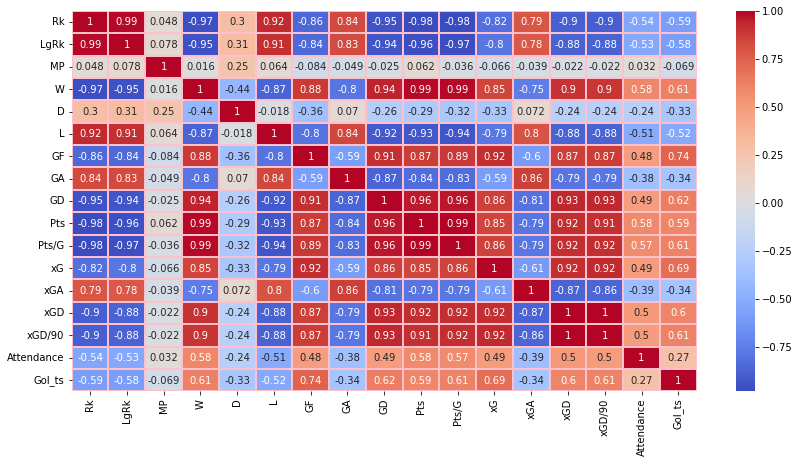

In [14]:
fig, ax = plt.subplots(figsize=(14,7))
sns.heatmap(liga.corr(), annot=True, cmap='coolwarm', linewidths=0.1, linecolor='pink', ax=ax)
plt.show()

1. Podem veure que en general les correlacions són altíssimes. Només la variable 'MP'(partits jugats) i la variable 'D'(empat) porten correlacions molt baixes en general amb totes les altres variables.
2. Es pot veure com moltes variables tenen una correlació positiva i negativa. Per exemple, la correlació entre les derrotes 'L' i els gols en contra 'GA', presenten una alta correlació negativa. Aixó es pot explicar perquè mentre més partits perduts tingui un equip és normal que rebin molts gols en contra, i per tant la correlació serà molt forta.
3. Ara en el següent apartat veurem amb alguns mètodes com podem rebutjar o no hipòtesis prèvias, abans d'analitzar la distribució o la correlació d'una o diverses variables.

### <div style="background-color: #F1819E; padding: 10px;"><b>Resultat Exercici 1</b>

</div>

Farem servir el test de Shapiro-Wilk de la llibreria scipy.stats. Amb aquesta prova estadística i un alfa del 5%, confirmarem o no el següent:

1. La hipotesí nul·la (H0) de que la variable 'GA' té una distribució normal o Gaussiana.
2. La hipotesi alternativa (H1) de que la variable 'GA' no té una distribució normal i per tant probablement no Gaussiana.

In [15]:
from scipy.stats import shapiro

info = liga['GA']
stat, p = shapiro(info)
print ('stat=%.3f, p=%.10f' % (stat, p))
if p > 0.05:
    print("La variable 'GA' té una distribució Probablement Gaussiana i, per tant no podem rebutjar l'hipòtesi nul·la")
    
else:
    print("La variable 'GA' no té probablement una distribució Gaussiana i, per tant podem rebutjar l'hipòtesi nul·la")

stat=0.983, p=0.2431350350
La variable 'GA' té una distribució Probablement Gaussiana i, per tant no podem rebutjar l'hipòtesi nul·la


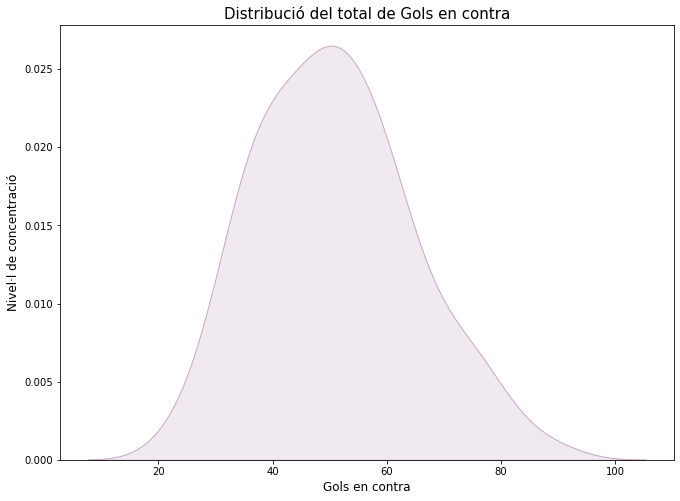

In [16]:
plt.figure(figsize=(11,8))
sns.kdeplot(liga['GA'], label='GA', color='#C8A8C5', fill=True)

plt.xlabel('Gols en contra', fontsize=12)
plt.ylabel('Nivel·l de concentració', fontsize=12)
plt.title('Distribució del total de Gols en contra', fontsize=15)

plt.show()

#### *Fem aquesta última gràfica només per corrobar la forma de la distribució de les dades de la variable 'GA', la qual segons el test de Shapiro-Wilk té un comportament gaussià.

### <div style="background-color: #F1819E; padding: 10px;"><b>Resultat Exercici 2</b>

</div>

#### Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

Hauriem de dir que si un equip de futbol té un promig de punts molt alt, es a dir que frequenment guanya la gent assistiria normalment en grans volums a l'estadi. Aixó ho podem veure cada setmana amb els grans equips de futbol com el Barça, Madrid, Bayern entre altres. En el gràfic de correlació de tot el dataset, ja veiem que aquesta relació ('attendance' vs 'Pts/G) és alta. Potser no de les més altes, però ha quedat catalogada adins dels colors càlids amb un 'R' de 0,57. Dit aixó, sería interessant veure si a través d'un altre test d'hipòtesi, però ara amb la correlació de Pearson, podem rebutjar o no l'hipòtesi de que aquestes dues variables estan relacionades.

Doncs, amb el mateix nivell de confiança de l'exercici anterior comprovarem el següent:

1. La hipotesí nul·la (H0) que diu que no hi ha relación entre 'attendance' i 'Pts/G', per tant que són independents.
2. La hipotesi alternativa (H1) que diu que les variables si estan relacionades.

In [17]:
from scipy.stats import pearsonr
stat, p = pearsonr(liga['Attendance'],liga['Pts/G'])
print('stat=%.3f p=%.10f' % (stat,p))
if p > 0.05:
    print("Les variables 'Attendance' i 'Pts/G' probablement són independents, per tant no podem rebutjar l'hipòtesi nul·la")
else:
    print("Les variables 'Attendance' i 'Pts/G' probablement no són independents, per tant podem rebutjar l'hipòtesi nul·la")

stat=0.573 p=0.0000000007
Les variables 'Attendance' i 'Pts/G' probablement no són independents, per tant podem rebutjar l'hipòtesi nul·la


Text(0.5, 0, 'Attendance')

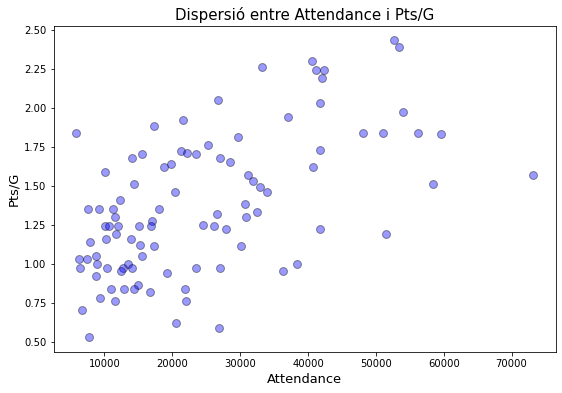

In [21]:
plt.figure(figsize=(9,6))


colors = "Blue"
area = np.pi*20


plt.scatter(x=liga['Attendance'], y=liga['Pts/G'], s=area, c=colors, alpha=0.4, edgecolors='black')

plt.title('Dispersió entre Attendance i Pts/G', fontsize=15)
plt.ylabel('Pts/G',fontsize=13)
plt.xlabel('Attendance',fontsize=13)

### *Fem aquesta última gràfica només per corrobar que la dispersió de les dades té un comportament força similar. Els punts creixents d'esquerra a dreta i d'abaix a dalt ens parlen d'una correlació positiva. La concentració dels punts potser no és la més forta, però té un agrupament que té relació amb el "R" de 0.57*.

### <div style="background-color: #F1819E; padding: 10px;"><b>Resultat Exercici 3</b>

</div>

#### Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

Com que tenim un dataset amb tantes variables que correlacionan força bé, doncs fa sentit fer servir el Friedman test. Perquè aquest test serveix quan s'assumeix que les mostres són dependents i no existiria una diferència significativa entre elles. Per tant, direm que el comportament de la variable victories ('W'), els gols s favor ('GF) i els gols del golejador ('Gol_ts') es dependent. Aixó ho expressarem de la següent manera:

1. Hipòtesi nul·la (H0): No existeix una diferència significativa entre les tres variables.
2. Hipòtesi alternativa (H1): Si existeix una diferència significativa entre les tres variables o almenys una de elles té una diferència significativa en el seu comportament respecte de les altres.

In [19]:
from scipy.stats import friedmanchisquare
stat, p = friedmanchisquare(liga['W'], liga['GF'], liga['Gol_ts'])
print ('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print("Probablemente no existeix una diferència significativa entre les variables en qüestió, per tant s'accepta l'hipòtesi nul·la")
else:
    print("Probablemente existeix una diferència significativa entre les variables en qüestió i, per tant es rebutja l'hipòtesi nul·la")

stat=150.551, p=0.000
Probablemente existeix una diferència significativa entre les variables en qüestió i, per tant es rebutja l'hipòtesi nul·la


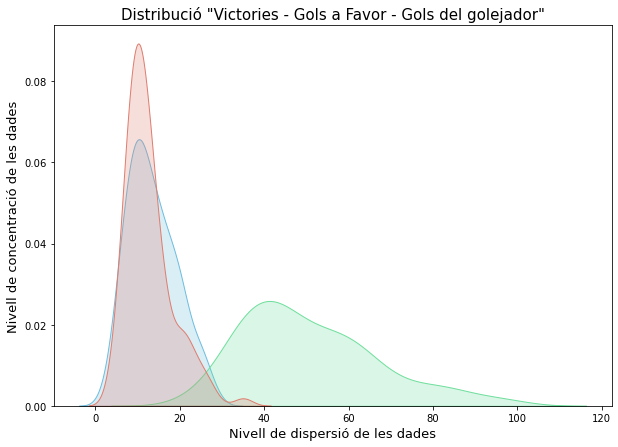

In [33]:
plt.figure(figsize= (10,7))

sns.kdeplot(liga['W'], label= 'W', color= '#6FBDDF', fill = True)
sns.kdeplot(liga['GF'], label= 'GF', color= '#6FDF9D', fill = True)
sns.kdeplot(liga['Gol_ts'], label= 'Gol_ts', color= '#DF7D6F', fill = True)

plt.title('Distribució "Victories - Gols a Favor - Gols del golejador"', fontsize=15)
plt.ylabel('Nivell de concentració de les dades',fontsize=13)
plt.xlabel('Nivell de dispersió de les dades',fontsize=13)

plt.show()

### *Fem aquesta última gràfica per observar el comportament de les dades. Mirant la distribució de les tres variables podem entendre perquè el test de Friedman ens indica qué podria existir una diferència significativa entre les variables. Si ens fixem les victories (en vermell) i els gols a favor (en blau) tenen un comportament molt similar, mentre que els gols del golejador (en verd) es distribueixen d'una manera molt diferent a la resta de variables. Aquest és un molt bon exemple per entendre que no només s'ha de tenir una bona correlació entre les variables, per assumir que no tenen differencies significatives en el seu comportament. Això podria fer incórrer en errors en el procés de predicció*.